<a href="https://colab.research.google.com/github/ketkiambekar/ML-algorithms/blob/master/K_means%20for%20Image%20Compression/K_Means_for_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, we will apply the K-means algorithm to lossy image compression, by reducing the number of colors used in an image.

We have a small version (128, 128, 3) and a large version (512, 512, 3) of the same image. The said images are available on the github page and needs to be loaded to files section on the left before executing this notebook. 

Our original image is represented by 24-bit colors i.e. each pixel is represented by $(2^8, 2^8, 2^8)$  RGB values.

To compress the image, we will use K-means to reduce the image to k = 16 colors. More speciﬁcally, each pixel in the image is considered a point in the three-dimensional (r, g, b)-space. To compress the image, we will cluster these points in color-space into 16 clusters, and replace each pixel with the closest cluster centroid.


In [21]:
from __future__ import division, print_function
import argparse
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import random

Set the Variables

In [2]:
# Setup
max_iter = 30
print_every = 10
num_clusters = 16
figure_idx = 0
image_path_small = "peppers-small.tiff"
image_path_large = "peppers-large.tiff"

Load the Small Image

Loaded small image with shape: (128, 128, 3)


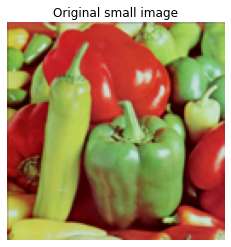

In [22]:

image = np.copy(mpimg.imread(image_path_small))
print('Loaded small image with shape: {}'.format(np.shape(image)))
plt.figure(figure_idx)
figure_idx += 1
plt.imshow(image)
plt.title('Original small image')
plt.axis('off')
savepath = os.path.join('.', 'orig_small.png')
plt.show()

Initialize centroids

In [12]:
H,W,C=image.shape

centroids_init=[]

print("Initial centroids are:")

#Add num_clusters number of unique values in the centroid np array
while len(centroids_init)< num_clusters :

  #Generate Random H,W,C
  H_r = random.randint(0,H-1)
  W_r = random.randint(0,W-1)
  
  print(image[H_r,W_r])

  centroids_init.append(image[H_r,W_r])

centroids=np.array(centroids_init)  

Initial centroids are:
[171 206 128]
[119 100  50]
[179  60  49]
[135  73  38]
[192 196  77]
[164 177  68]
[141  40  35]
[195  48  39]
[131 143  55]
[66  2  2]
[202  49  42]
[149  14  16]
[187  55  41]
[135 187  98]
[216  71  45]
[115 141 103]


Update Centroids: We use the small image for determining cluster centroids for speedy calculations.

In [13]:
H, W, C = image.shape
print(H,W,C)
cluster_info = np.zeros(shape=(H,W,1))

for m in range (0, max_iter):

  #Loop to determine nearest centroid for each pixel
  for i in range(0,H ):
    for j in range(0,W):  

      #print(centroids.shape)
      #print(image[i][j].shape)
      distances = centroids - image[i][j]

      dist = np.sum(distances**2, axis=1)
    
      #Color the Dots
      cluster_info[i][j]= np.argmin(dist, axis=0)     

  #Update Centroids
  new_cent=[]
  for k in range(0,num_clusters):
    cluster=[]
    np_cluster=None
    #select all points with centroid k from cluster_info
    for i in range(0,H ):
      for j in range(0,W):  
        if cluster_info[i][j]==k:
          cluster.append(image[i][j])

    np_cluster =  np.array(cluster)

    #calculate mean
    new_cent.append( np.mean(cluster, axis=0))
    #print(len(new_cent))

  #Add mean to list of new centroids
  new_centroids = np.array(new_cent)
  if np.array_equal(new_centroids, centroids):
    break
  
  centroids = new_centroids
  if m%print_every==0:
    print('iteration {}: Centroids are {} '.format(m,centroids))


128 128 3
iteration 0: Centroids are [[150.54618016 145.51653364  82.83808438]
 [135.9527105  121.29642445  66.96770473]
 [148.88293651 120.50992063  68.29464286]
 [152.15700483 129.0942029   73.26207729]
 [147.49066667 139.52088889  74.18577778]
 [144.26162162 135.72324324  72.90378378]
 [150.85907336 107.09555985  61.98069498]
 [171.66515837  92.06259427  59.43589744]
 [143.03360371 134.26767092  71.86906141]
 [110.9588581   73.80100756  44.42821159]
 [174.8601723   92.00331345  59.08548708]
 [143.68041237  95.47891284  55.67853796]
 [165.6        111.62272727  69.29818182]
 [145.70059289 146.20454545  79.06521739]
 [155.53455724 120.59719222  69.7937365 ]
 [138.3121547  127.59668508  70.7679558 ]] 
iteration 10: Centroids are [[187.0697888  211.7768595  172.62075298]
 [104.63931889 120.38854489  57.10990712]
 [125.21276596  98.7781155   50.8768997 ]
 [203.3442623  151.10382514 121.92349727]
 [183.84778122 201.75077399  91.84881321]
 [152.9688958  179.66796267  79.84214619]
 [171.313

Load Large Image

[INFO] Loaded large image with shape: (512, 512, 3)


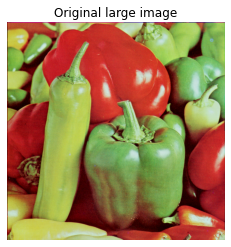

In [14]:
# Load large image
image_large = np.copy(mpimg.imread(image_path_large))
image_large.setflags(write=1)
print('[INFO] Loaded large image with shape: {}'.format(np.shape(image_large)))
plt.figure(figure_idx)
figure_idx += 1
plt.imshow(image_large)
plt.title('Original large image')
plt.axis('off')
savepath = os.path.join('.', 'orig_large.png')
plt.savefig(fname=savepath, transparent=True, format='png', bbox_inches='tight')

Update Image: We update the large image with cluster centroids calculated on the small image

In [17]:
H, W, C = image_large.shape

image_updated = np.zeros((H,W,C))

for i in range (0, H):
  for j in range (0, W):

    #Find closest centroid to the image:
    distances = centroids - image_large[i][j]
    dist = np.sum(distances**2, axis=1)
    
    image_large[i][j]= centroids[int(np.argmin(dist, axis=0))]



We previously represented our image with 24-bit colors.
Each pixel was represented by $(2^8, 2^8, 2^8)$  RGB values in the original image.

In the new image, each new pixel is represented as one of 16 values (from the set of 16 cluster means) i.e. 12-bit color. 
To represent one of 16 colors requires $log_2 16 = 4$ bits per pixel.
We have therefore achieved a compression factor of about 24/4 = 6 for the image.

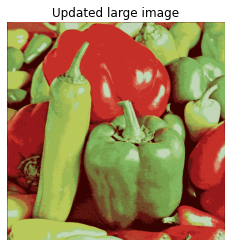

In [19]:
    plt.figure(figure_idx)
    figure_idx += 1
    plt.imshow(image_large)
    plt.title('Updated large image')
    plt.axis('off')
    savepath = os.path.join('.', 'updated_large.png')
    plt.savefig(fname=savepath, transparent=True, format='png', bbox_inches='tight')
    plt.show()
